<a href="https://colab.research.google.com/github/JulienJ-44/rakuteam/blob/main/11_bis_Vote_3_mod%C3%A8les_ypred_proba_text_0_82_img_0_55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Connection au google drive 
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
# import des datasets : y_pred_proba
y_pred_proba_rf = pd.read_csv("/content/gdrive/MyDrive/Datascientest/Projet_RAKUTEN/8- y_pred_probas_3_modèles/ypred_proba_RandomForest_Global_score0_74.csv")
y_pred_proba_dnntext = pd.read_csv("/content/gdrive/MyDrive/Datascientest/Projet_RAKUTEN/8- y_pred_probas_3_modèles/ypred_proba_DnnText_score0_82.csv")
y_train = pd.read_csv("/content/gdrive/MyDrive/Datascientest/Projet_RAKUTEN/8- y_pred_probas_3_modèles/y_train.csv")
y_test = pd.read_csv("/content/gdrive/MyDrive/Datascientest/Projet_RAKUTEN/8- y_pred_probas_3_modèles/y_test.csv")
y_pred_proba_img = pd.read_csv("/content/gdrive/MyDrive/Datascientest/Projet_RAKUTEN/8- y_pred_probas_3_modèles/ypred_proba_Image_score0_55_v4.csv")


In [ ]:
y_test

,Unnamed: 0,prdtypecode
0,77312,2582
1,74413,10
2,33548,1320
3,59073,2583
4,25604,2583
...,...,...
16979,10968,2705
16980,11112,1920
16981,37626,2060
16982,21299,2583


In [ ]:
# Remplacer les labels de 0 à 26

y_test = y_test.replace({'prdtypecode': {10: 1, 2280:2,   50:3, 1280:4, 2705:5, 2522:6, 2582:7, 1560:8, 1281:9, 1920:10, 2403:11,
       1140:12, 2583:13, 1180:14, 1300:15, 2462:16, 1160:17, 2060:18,   40:19,   60:20, 1320:21, 1302:22,
       2220:23, 2905:24, 2585:25, 1940:26, 1301:0}})

In [ ]:
# moyenne des probas des deux modèles

y_pred_proba = y_pred_proba_rf + y_pred_proba_dnntext + y_pred_proba_img
y_pred_proba /= 3

In [ ]:
# Drop le Unnamed
y_pred_proba = y_pred_proba.drop('Unnamed: 0', axis =1)
y_test = y_test.drop('Unnamed: 0', axis =1)

In [ ]:
y_pred_proba.shape

(16984, 27)

In [ ]:
y_test.shape

(16984, 1)

In [ ]:
# Convertir Dataframe en array
y_pred_proba_arr = y_pred_proba.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
y_test

array([[ 7],
       [ 1],
       [21],
       ...,
       [18],
       [13],
       [13]])

In [ ]:
# on prend l'index de la proba la + élevée
# pour récupérer les classes

y_pred = y_pred_proba_arr.argmax(axis=1)
y_pred

array([ 7,  1, 21, ..., 18, 13, 13])

In [ ]:
y_test.shape

(16984, 1)

In [ ]:
# Pour ajouter une dimension en plus
y_pred = np.reshape(y_pred, (-1, 1))


In [ ]:
y_pred.shape

(16984, 1)

In [ ]:
y_pred

array([[ 8],
       [11],
       [21],
       ...,
       [18],
       [13],
       [13]])

In [ ]:
# Crosstab avec ravel pr enlever dimension et eviter message d'erreur (Error: If using all scalar values, you must pass an index)
dfcross = pd.crosstab(y_test.ravel(), y_pred.ravel(), rownames=['Classe réelle'], colnames=['Classe prédite'], normalize= 0)

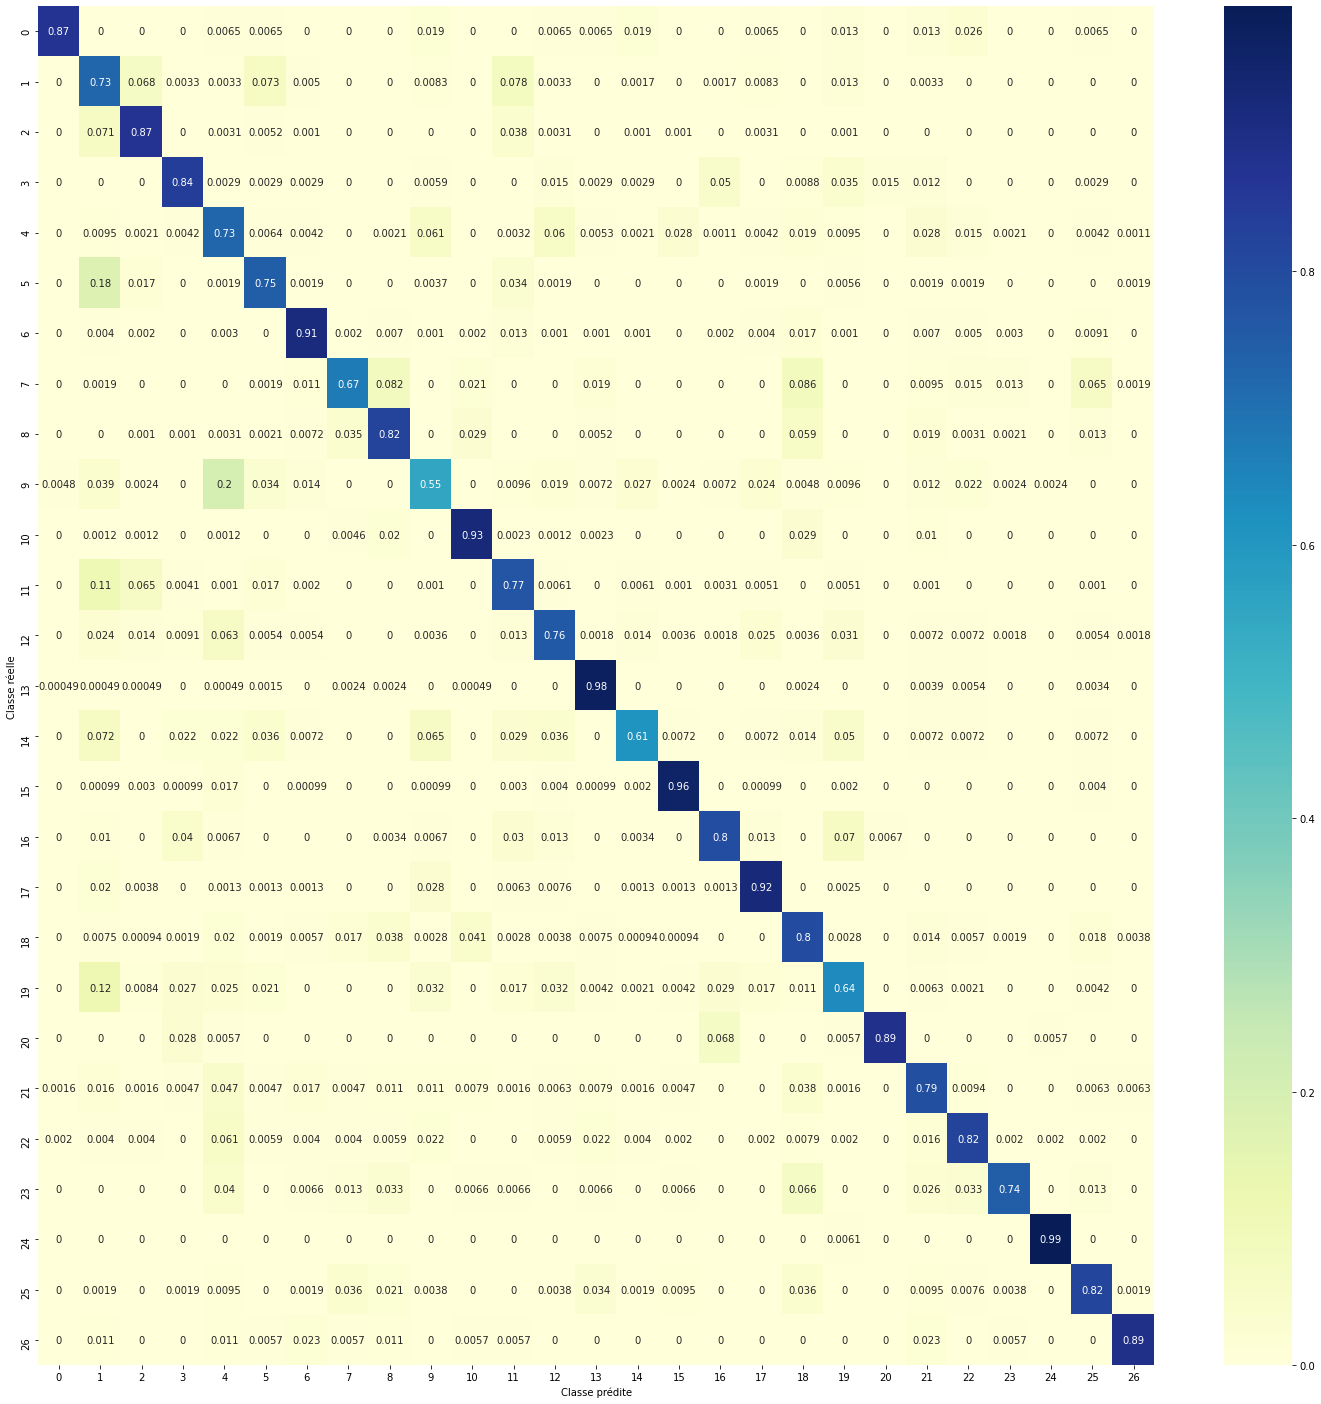

In [ ]:
import seaborn as sns
# Matrice de confusion
plt.figure(figsize=(25,25))
sns.heatmap(dfcross,  annot=True, cmap="YlGnBu");

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.ravel(), y_pred.ravel())


0.8330193122939237

In [ ]:
# PONDERATION des probabilités en fonction du score
# calcul des scores

score1_rf = 0.74
score2_dnntext = 0.82
score3_img = 0.55
print(score1_rf, score2_dnntext, score3_img)

0.74 0.82 0.55


In [ ]:
# Drop la  colonne Unnamed: 0
y_pred_proba_rf = y_pred_proba_rf.drop('Unnamed: 0', axis =1)
y_pred_proba_dnntext = y_pred_proba_dnntext.drop('Unnamed: 0', axis =1)
y_pred_proba_img = y_pred_proba_img.drop('Unnamed: 0', axis =1)

In [ ]:
# Convertir Dataframe en array
y_pred_proba_rf = y_pred_proba_rf.to_numpy()
y_pred_proba_dnntext = y_pred_proba_dnntext.to_numpy()
y_pred_proba_img = y_pred_proba_img.to_numpy()

In [ ]:
# nouveau calcul des probas pondérées
y_pred_proba_weighted = (score1_rf * y_pred_proba_rf + score2_dnntext * y_pred_proba_dnntext + score3_img * y_pred_proba_img) / (score1_rf + score2_dnntext + score3_img)

y_pred_weighted = y_pred_proba_weighted.argmax(axis=1)


In [ ]:
# Pour ajouter une dimension en plus
y_pred_weighted = np.reshape(y_pred_weighted, (-1, 1))

In [ ]:
# Crosstab avec ravel pr enlever dimension et eviter message d'erreur (Error: If using all scalar values, you must pass an index)
dfcross2 = pd.crosstab(y_test.ravel(), y_pred_weighted.ravel(), normalize= 0)

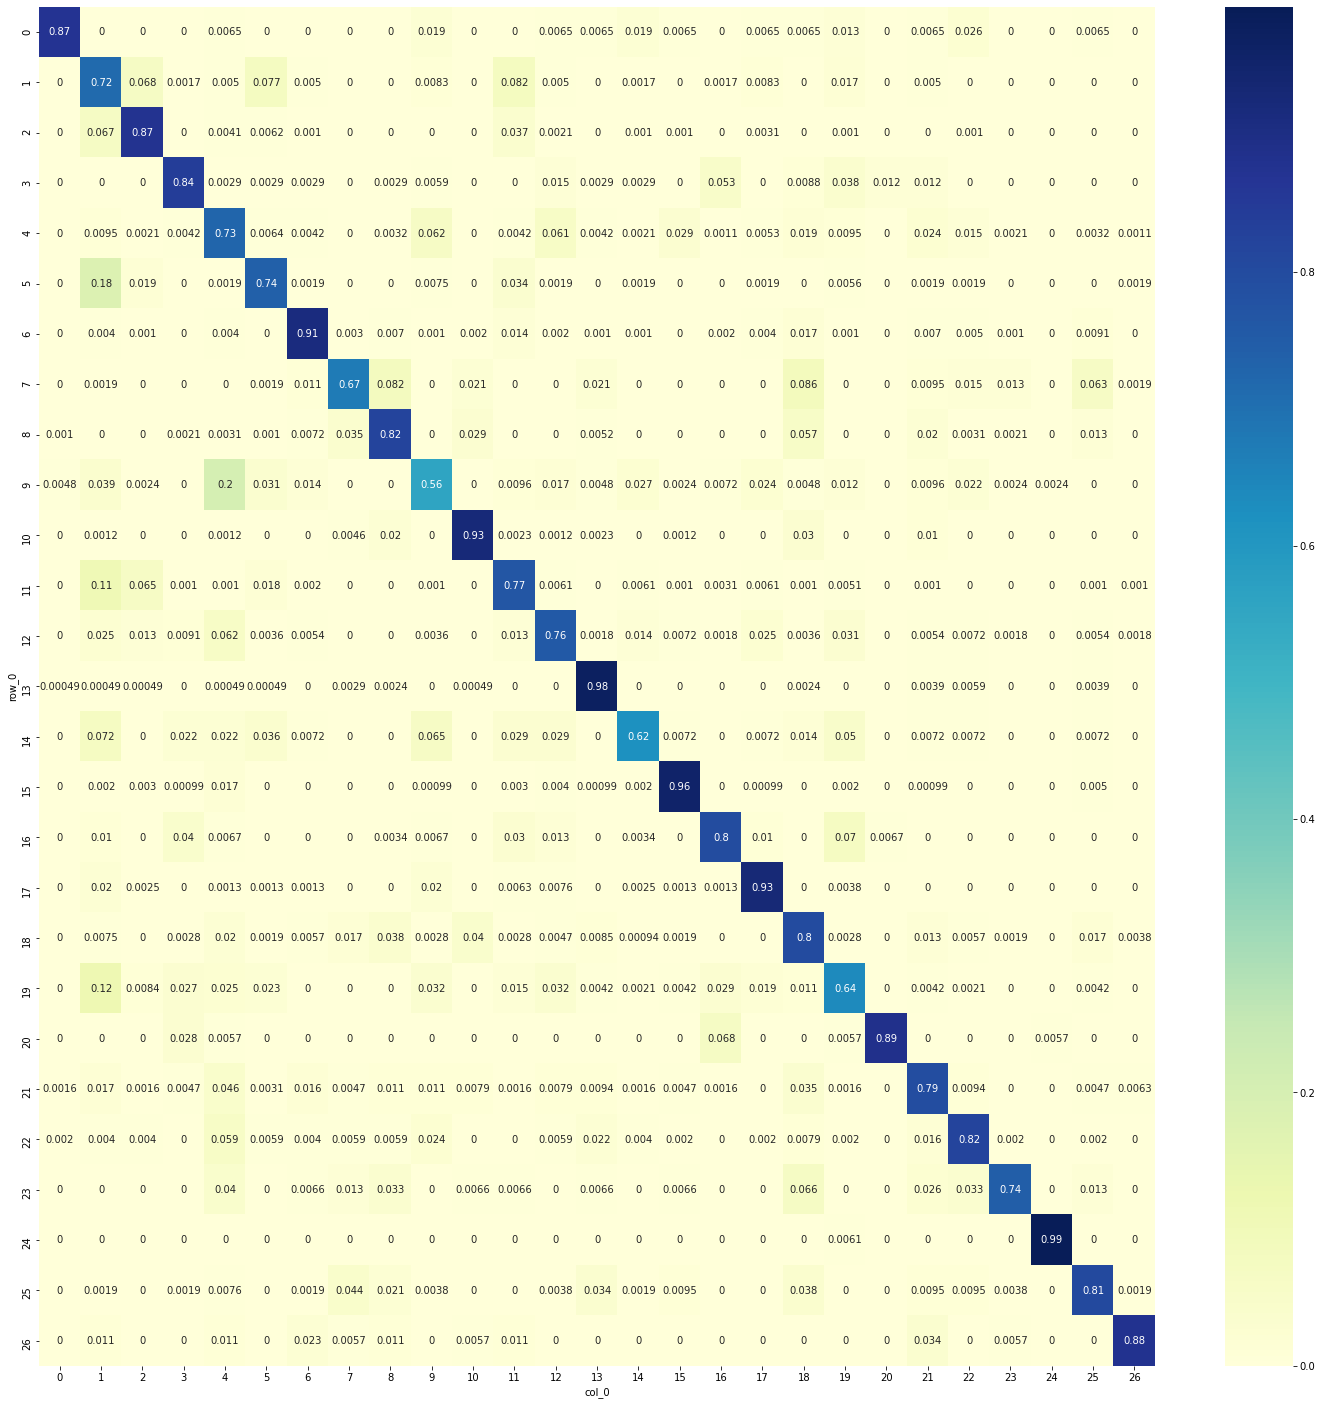

In [ ]:
import seaborn as sns
# Matrice de confusion
plt.figure(figsize=(25,25))
sns.heatmap(dfcross2,  annot=True, cmap="YlGnBu");

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.ravel(), y_pred_weighted.ravel())

0.8321950070654733

In [ ]:
from sklearn import metrics


print("Précision de la prédiction:", metrics.accuracy_score(y_test, y_pred_weighted)*100, '%')

print("Evaluation détaillée de la Classification par RDF :\n \n" ,
      (metrics.classification_report(y_test, y_pred_weighted)))

Précision de la prédiction: 83.21950070654734 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       154
           1       0.50      0.72      0.59       601
           2       0.86      0.87      0.87       964
           3       0.84      0.84      0.84       341
           4       0.72      0.73      0.72       944
           5       0.77      0.74      0.75       536
           6       0.94      0.91      0.93       993
           7       0.78      0.67      0.72       524
           8       0.85      0.82      0.83       967
           9       0.62      0.56      0.59       415
          10       0.90      0.93      0.91       866
          11       0.82      0.77      0.79       979
          12       0.76      0.76      0.76       552
          13       0.96      0.98      0.97      2045
          14       0.65      0.62      0.63       139
          15       0.95      0.9

In [ ]:
# Remplacer les labels à l'original

y_test = y_test.replace({'prdtypecode': {1: 10, 2:2280,   3:50, 4:1280, 5:2705, 6:2522, 7:2582, 8:1560, 9:1281, 10:1920, 11:2403,
       12:1140, 13:2583, 14:1180, 15:1300, 16:2462, 17:1160, 18:2060,   19:40,   20:60, 21:1320, 22:1302,
       23:2220, 24:2905, 25:2585, 26:1940, 0:1301}})



In [ ]:
y_test

array([[ 7],
       [ 1],
       [21],
       ...,
       [18],
       [13],
       [13]])

In [ ]:
# Remplacer les labels à l'original

y_test = y_test.replace({1: 10, 2:2280, 3:50, 4:1280, 5:2705, 6:2522, 7:2582, 8:1560, 9:1281, 10:1920, 11:2403,
       12:1140, 13:2583, 14:1180, 15:1300, 16:2462, 17:1160, 18:2060,   19:40,   20:60, 21:1320, 22:1302,
       23:2220, 24:2905, 25:2585, 26:1940, 0:1301})


AttributeError: ignored

In [ ]:
np.where(y_test == 1,10,y_test)
np.where(y_test == 2,2280,y_test)
np.where(y_test == 3,50,y_test)
np.where(y_test == 4,1280,y_test)
np.where(y_test == 5,2705,y_test)
np.where(y_test == 6,2522,y_test)
np.where(y_test == 7,2582,y_test)
np.where(y_test == 8,1560,y_test)
np.where(y_test == 9,1281,y_test)
np.where(y_test == 10,1920,y_test)
np.where(y_test == 11,2403,y_test)
np.where(y_test == 12,1140,y_test)
np.where(y_test == 13,2583,y_test)
np.where(y_test == 14,1180,y_test)
np.where(y_test == 15,1300,y_test)
np.where(y_test == 16,2462,y_test)
np.where(y_test == 17,1160,y_test)
np.where(y_test == 18,2060,y_test)
np.where(y_test == 19,40,y_test)
np.where(y_test == 20,60,y_test)
np.where(y_test == 21,1320,y_test)
np.where(y_test == 22,1302,y_test)
np.where(y_test == 23,2220,y_test)
np.where(y_test == 24,2905,y_test)
np.where(y_test == 25,2585,y_test)
np.where(y_test == 26,1940,y_test)
np.where(y_test == 0,1301,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


array([[ 7],
       [ 1],
       [21],
       ...,
       [18],
       [13],
       [13]])